## Assignment: Advanced Regression
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading the csv file
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking the shape of the data
data.shape

(1460, 81)

In [4]:
# Checking Data types of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Dropping the duplicates if any
data.drop_duplicates(inplace=True)
data.shape

(1460, 81)

In [6]:
# Checking for columns containing missing values
null_val = pd.DataFrame(data.isna().sum().sort_values()[data.isna().sum().sort_values()>0], columns=['No_null_val'])
null_val['Perc_null_val'] = round(null_val['No_null_val']/len(data)*100)
null_val

,No_null_val,Perc_null_val
Electrical,1,0.0
MasVnrType,8,1.0
MasVnrArea,8,1.0
BsmtQual,37,3.0
BsmtCond,37,3.0
BsmtFinType1,37,3.0
BsmtFinType2,38,3.0
BsmtExposure,38,3.0
GarageQual,81,6.0
GarageFinish,81,6.0


In [7]:
# We'll drop the columns with more than 80% of the missing values
data.drop(columns=['Fence', 'Alley', 'MiscFeature', 'PoolQC'], inplace=True)
null_val = null_val[:len(null_val)-4] # updating the null list to keep a track of it
null_val

,No_null_val,Perc_null_val
Electrical,1,0.0
MasVnrType,8,1.0
MasVnrArea,8,1.0
BsmtQual,37,3.0
BsmtCond,37,3.0
BsmtFinType1,37,3.0
BsmtFinType2,38,3.0
BsmtExposure,38,3.0
GarageQual,81,6.0
GarageFinish,81,6.0


<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

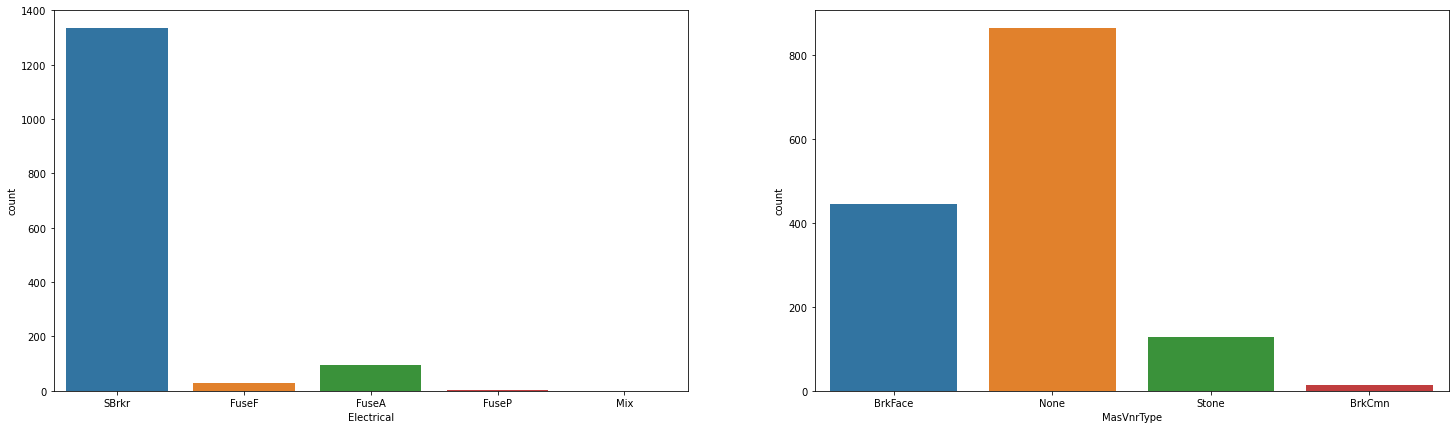

In [8]:
plt.figure(figsize=(25, 7))
plt.subplot(1,2,1)
sns.countplot(data['Electrical'])
plt.subplot(1,2,2)
sns.countplot(data['MasVnrType'])

In [9]:
# By going through the data dictonary we shall replacing NAN values with mode as its categorical column
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)

In [10]:
# Updating the null list to keep a track of it
null_val = null_val[2:] 
null_val

,No_null_val,Perc_null_val
MasVnrArea,8,1.0
BsmtQual,37,3.0
BsmtCond,37,3.0
BsmtFinType1,37,3.0
BsmtFinType2,38,3.0
BsmtExposure,38,3.0
GarageQual,81,6.0
GarageFinish,81,6.0
GarageYrBlt,81,6.0
GarageType,81,6.0


In [11]:
# Getting all the column names 
null_val.index

Index(['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageYrBlt',
       'GarageType', 'GarageCond', 'LotFrontage', 'FireplaceQu'],
      dtype='object')

In [12]:
cols = ['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageYrBlt',
       'GarageType', 'GarageCond', 'LotFrontage', 'FireplaceQu']

In [13]:
# Checking for Numerical columns to impute missing values
for i in cols:
    if data[i].dtype == 'float64' or data[i].dtype == 'int64':
        print(i)

MasVnrArea
GarageYrBlt
LotFrontage


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

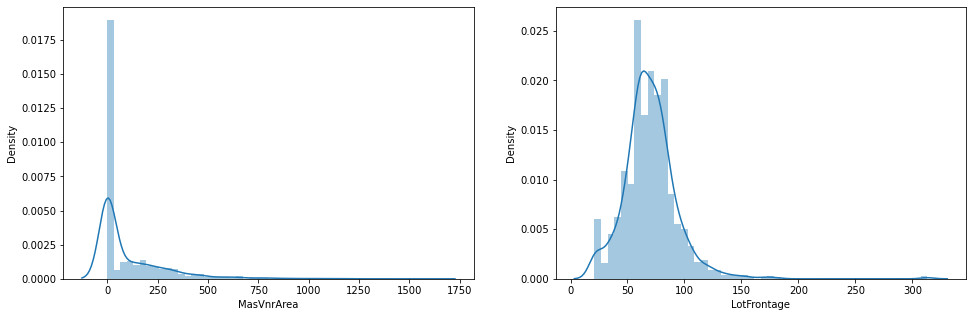

In [14]:
# Plotting to visually see the distribution to replace the missing values
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
sns.distplot(data['MasVnrArea'])
plt.subplot(1,3,2)
sns.distplot(data['LotFrontage'])

In [15]:
# Replacing with median as the data is skewed
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

In [16]:
# Updating the null list to keep a track of it
null_val = null_val.drop(['MasVnrArea', 'LotFrontage']) 
null_val

,No_null_val,Perc_null_val
BsmtQual,37,3.0
BsmtCond,37,3.0
BsmtFinType1,37,3.0
BsmtFinType2,38,3.0
BsmtExposure,38,3.0
GarageQual,81,6.0
GarageFinish,81,6.0
GarageYrBlt,81,6.0
GarageType,81,6.0
GarageCond,81,6.0


In [17]:
# Though the column GarageYRBlt is int, It is actually gives the Year of Garage built and can be taken as ordinal categories
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [18]:
# As the unique values are 97, we can not create the dummy variable to it. Instead we'll replace NAN values with 0!
data['GarageYrBlt'].fillna(0, inplace=True)

One thing we saw common in Garage columns ie all the missing values for entire garage data are same(81 records missing)
Therefore from Data dictonary we got to know that the missing values represent No garage for the property and 
therefore no details were provided for all 81 records

In [19]:
# Checking values
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [20]:
# Lets fill the NAN values as No Garage instead.
gar = data['GarageType'].fillna('No Garage')
pd.get_dummies(gar).head()

,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0


Now, we don't need all 7 columns in the data. We can anyways drop `No Garage` can be identified if rest of the 6 colums are 0

In [21]:
# Visuallising the things
pd.get_dummies(data['GarageType']).head()

,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,1,0,0,0,0


In [22]:
# Extracting only Garage columns to treat
garage = data[['GarageQual', 'GarageFinish', 'GarageType', 'GarageCond']]
garage.head()

,GarageQual,GarageFinish,GarageType,GarageCond
0,TA,RFn,Attchd,TA
1,TA,RFn,Attchd,TA
2,TA,RFn,Attchd,TA
3,TA,Unf,Detchd,TA
4,TA,RFn,Attchd,TA


In [23]:
# Getting all the dummy variable for Garage
garage = pd.get_dummies(garage)
garage

,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1456,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1457,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1458,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [24]:
# Dropping the columns and concatinating to main data frame
data.drop(columns=['GarageQual', 'GarageFinish', 'GarageType', 'GarageCond'], inplace=True)
data = pd.concat([data, garage], axis=1)
data.shape

(1460, 92)

In [25]:
# Updating the null list to keep a track of it
null_val = null_val.drop(['GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'GarageCond']) 
null_val

,No_null_val,Perc_null_val
BsmtQual,37,3.0
BsmtCond,37,3.0
BsmtFinType1,37,3.0
BsmtFinType2,38,3.0
BsmtExposure,38,3.0
FireplaceQu,690,47.0


Smilarlly we see BsmtQual columns(Basement) ie all the missing values for entire BsmtQual data is same(37 records missing)
We got to know that the missing values represent No Basement for the property and no details were provided for all other records. Therefore using the get dummies function to encode it to binary forms. Lets also add FireplaceQu which also means the property did not had any Fire Place at all.

In [26]:
# Repeating the same things done for Garage columns
base_fire = data[['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'FireplaceQu']]
base_fire = pd.get_dummies(base_fire)
data.drop(columns=['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'FireplaceQu'], inplace=True)
data = pd.concat([data, base_fire], axis=1)
data.shape

(1460, 115)

In [27]:
# Now let us look numerical columns one by one to make sure its proper before feeding it to ML
data.dtypes.value_counts()

uint8      48
int64      35
object     29
float64     3
dtype: int64

In [28]:
# Checking the Data Dictonry for these columns
data.select_dtypes('int64').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

Out of all these columns we could find that `MSSubClass`, `MoSold` and `YrSold` are actually the normial categories representing some numbers. Therefore we shall first convert this to object and then binary encoding or dummy variable creation is performed.
Also Some of the other variables (Eg: `OverallCond`, `OverallQual`) seems to have a pattern like Ordinal categories(Ranges from 1-10) where in we can leave as it beacuse as the number increases the quality also increases

In [29]:
# Dropping Id as its just a number and converting other columns to object
data.drop(columns=['Id'], inplace=True)
data['MSSubClass'] = data['MSSubClass'].astype(dtype='object')
data['MoSold'] = data['MoSold'].astype(dtype='object')
data['YrSold'] = data['YrSold'].astype(dtype='object')

In [30]:
#Performing One hot encoding & creating Dummy Variables
#NOTE: We are create dummy variables only on the nominal categories, not on the ordinal categories!
obj = data.select_dtypes(include='object')
data = pd.concat([data, pd.get_dummies(obj, drop_first=True)], axis=1).drop(columns=obj.columns, axis=1)

In [31]:
#Checking the final dtypes of the columns
data.dtypes.value_counts()

uint8      239
int64       31
float64      3
dtype: int64

In [32]:
# Outlier Treatment
def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75, 25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    return UL, LL

In [33]:
for column in data.columns:
    if data[column].dtype == 'float' or data[column].dtype == 'int':
        UL, LL = outlier_limits(data[column])
        data[column] = np.where((data[column] > UL) | (data[column] < LL), np.nan, data[column])

In [34]:
data = data.dropna()
data.shape

(1195, 273)

In [35]:
# Having a copy just incase for refernce
data_prep = data.copy(deep=True)

In [36]:
# Split into X and y
X = data_prep.drop(['SalePrice'], axis=1)
y = data_prep['SalePrice']

In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [38]:
# Normalizing the data
cols = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)

In [39]:
# Using Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [40]:
print(f"{'-'*20}Training Performance{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))


--------------------Training Performance--------------------

R2-Score on Training set ---> 0.95
Residual Sum of Squares (RSS) on Training set  ---> 201805567875.37
Mean Absolute Error (MAE) on Training set      ---> 10858.48
Mean Squared Error (MSE) on Training set       ---> 241394219.95
Root Mean Squared Error (RMSE) on Training set ---> 15536.87

--------------------Testing Performance--------------------

R2-Score on Testing set ---> -9.458384609261141e+20
Residual Sum of Squares (RSS) on Testing set  ---> 1.3224734432533292e+33
Mean Absolute Error (MAE) on Testing set      ---> 140770275366745.0
Mean Squared Error (MSE) on Testing set       ---> 3.6837700369173524e+30
Root Mean Squared Error (RMSE) on Testing set ---> 1919314991583547.2


R2 on test set is negative only when the chosen model does not follow the trend of the data. It seems that our model may be giving better performance in the training data because of over-fitting. It can be a case of over-fitting in the model. It can happen because of various reasons like small dataset and noise in the dataset. Lets regularise the model

In [41]:
# Using Ridge
Re = Ridge()
Re.fit(X_train, y_train)
y_pred_train = Re.predict(X_train)
y_pred_test = Re.predict(X_test)

--------------------Training Performance--------------------

R2-Score on Training set ---> 0.95
Residual Sum of Squares (RSS) on Training set  ---> 202195813921.94
Mean Absolute Error (MAE) on Training set      ---> 10904.76
Mean Squared Error (MSE) on Training set       ---> 241861021.44
Root Mean Squared Error (RMSE) on Training set ---> 15551.88

--------------------Testing Performance--------------------

R2-Score on Testing set ---> 0.86
Residual Sum of Squares (RSS) on Testing set  ---> 191707304793.57
Mean Absolute Error (MAE) on Testing set      ---> 15946.34
Mean Squared Error (MSE) on Testing set       ---> 534003634.52
Root Mean Squared Error (RMSE) on Testing set ---> 23108.52

--------------------Residual Plots--------------------


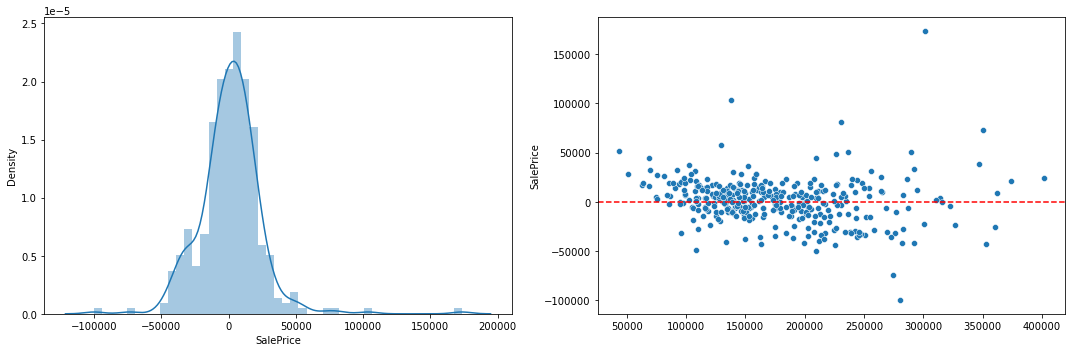

In [42]:
print(f"{'-'*20}Training Performance{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
residuals=(y_test - y_pred_test)
sns.distplot(residuals)

plt.subplot(1,2,2)
sns.scatterplot(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [43]:
# Using Lasso
ls = Lasso()
ls.fit(X_train, y_train)
y_pred_train = ls.predict(X_train)
y_pred_test = ls.predict(X_test)

--------------------Training Performance--------------------

R2-Score on Training set ---> 0.95
Residual Sum of Squares (RSS) on Training set  ---> 201872411336.38
Mean Absolute Error (MAE) on Training set      ---> 10877.74
Mean Squared Error (MSE) on Training set       ---> 241474176.24
Root Mean Squared Error (RMSE) on Training set ---> 15539.44

--------------------Testing Performance--------------------

R2-Score on Testing set ---> 0.86
Residual Sum of Squares (RSS) on Testing set  ---> 193019095978.95
Mean Absolute Error (MAE) on Testing set      ---> 16069.27
Mean Squared Error (MSE) on Testing set       ---> 537657648.97
Root Mean Squared Error (RMSE) on Testing set ---> 23187.45

--------------------Residual Plots--------------------


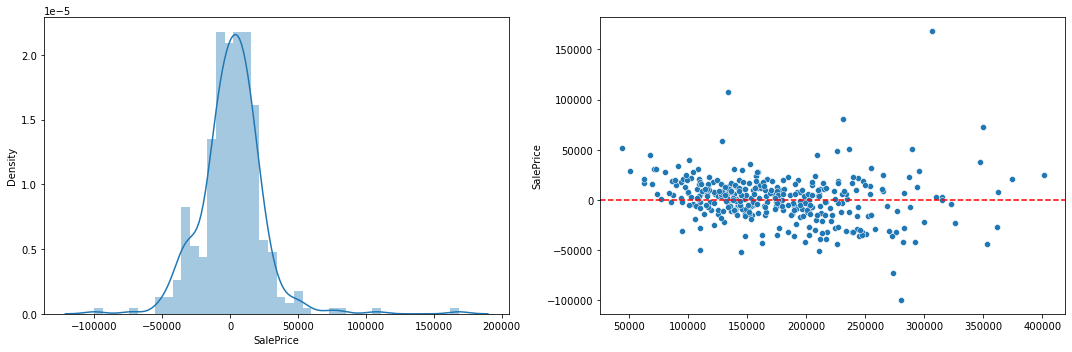

In [44]:
print(f"{'-'*20}Training Performance{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
residuals=(y_test - y_pred_test)
sns.distplot(residuals)

plt.subplot(1,2,2)
sns.scatterplot(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

#### Optimizing Ridge  Model

In [45]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 1)
hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Ridge_Regression = Ridge(solver='auto', random_state=1)
GridSearch = GridSearchCV(Ridge_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 545706339.628598
Best parameter ---> {'alpha': 100}


In [46]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 2)
hyper_param = {'alpha':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]}
Ridge_Regression = Ridge(solver='auto', random_state=1)
GridSearch = GridSearchCV(Ridge_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 540932865.4190556
Best parameter ---> {'alpha': 160}


In [47]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 3)
hyper_param = {'alpha':[151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]}
Ridge_Regression = Ridge(solver='auto', random_state=1)
GridSearch = GridSearchCV(Ridge_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 540932677.0529917
Best parameter ---> {'alpha': 159}


--------------------Training Performance Ridge--------------------

R2-Score on Training set ---> 0.93
Residual Sum of Squares (RSS) on Training set  ---> 247092454273.27
Mean Absolute Error (MAE) on Training set      ---> 11894.8
Mean Squared Error (MSE) on Training set       ---> 295565136.69
Root Mean Squared Error (RMSE) on Training set ---> 17192.01

--------------------Testing Performance Ridge--------------------

R2-Score on Testing set ---> 0.87
Residual Sum of Squares (RSS) on Testing set  ---> 179743041719.73
Mean Absolute Error (MAE) on Testing set      ---> 15134.34
Mean Squared Error (MSE) on Testing set       ---> 500676996.43
Root Mean Squared Error (RMSE) on Testing set ---> 22375.81

--------------------Residual Plots--------------------


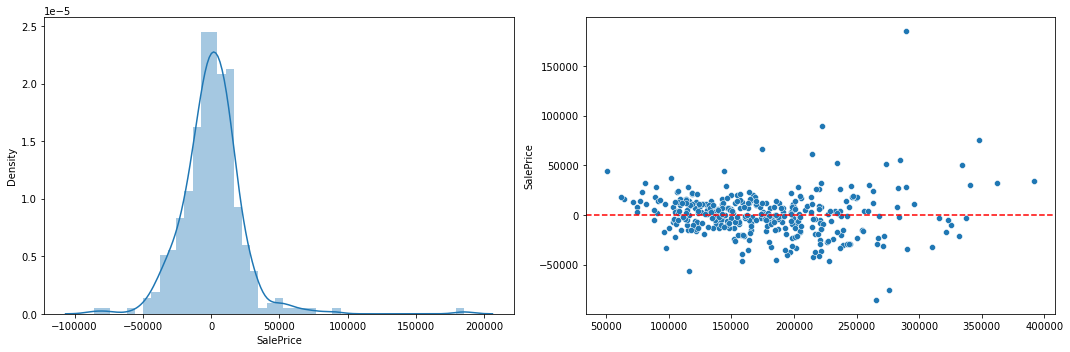

In [48]:
#Training the final Ridge Regression Model
Ridge_Regression = Ridge(alpha=159, solver='auto', random_state=1) #Optimal lamda/alpha value
Ridge_Regression.fit(X_train, y_train)
y_pred_train = Ridge_Regression.predict(X_train)
y_pred_test = Ridge_Regression.predict(X_test)

print(f"{'-'*20}Training Performance Ridge{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance Ridge{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
residuals=(y_test - y_pred_test)
sns.distplot(residuals)

plt.subplot(1,2,2)
sns.scatterplot(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [49]:
coeff = pd.DataFrame(Ridge_Regression.coef_, X_train.columns, columns=['Contribution']).sort_values(by=['Contribution'],ascending=False)
coeff = coeff[coeff.Contribution!=0]
coeff

,Contribution
GrLivArea,8917.198328
OverallQual,7310.905761
1stFlrSF,7061.070494
TotalBsmtSF,7017.258087
BsmtQual_Ex,6371.150219
...,...
BsmtExposure_No,-2282.631173
KitchenQual_Gd,-2584.811947
KitchenAbvGr,-2876.513180
KitchenQual_TA,-2901.545669


#### Optimizing Lasso  Model

In [50]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 1)
hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
Lasso_Regression = Lasso()
GridSearch = GridSearchCV(Lasso_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 514716009.0642689
Best parameter ---> {'alpha': 1000}


In [51]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 2)
hyper_param = {'alpha':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 
                        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]}
Lasso_Regression = Lasso()
GridSearch = GridSearchCV(Lasso_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 509528458.1623683
Best parameter ---> {'alpha': 600}


In [52]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 3)
hyper_param = {'alpha':[510, 520, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700]}
Lasso_Regression = Lasso()
GridSearch = GridSearchCV(Lasso_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 509099899.98630476
Best parameter ---> {'alpha': 560}


--------------------Training Performance Lasso--------------------

R2-Score on Training set ---> 0.93
Residual Sum of Squares (RSS) on Training set  ---> 272223314661.5
Mean Absolute Error (MAE) on Training set      ---> 12704.8
Mean Squared Error (MSE) on Training set       ---> 325625974.48
Root Mean Squared Error (RMSE) on Training set ---> 18045.11

--------------------Testing Performance Lasso--------------------

R2-Score on Testing set ---> 0.88
Residual Sum of Squares (RSS) on Testing set  ---> 165602107174.55
Mean Absolute Error (MAE) on Testing set      ---> 13992.38
Mean Squared Error (MSE) on Testing set       ---> 461287206.61
Root Mean Squared Error (RMSE) on Testing set ---> 21477.6

--------------------Residual Plots--------------------


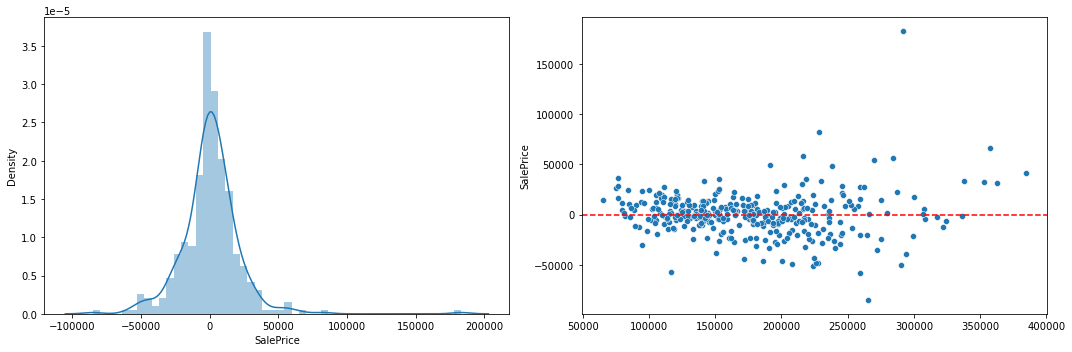

In [53]:
#Training the final Lasso Regression Model
Lasso_Regression = Lasso(alpha=560) #Optimal lamda/alpha value
Lasso_Regression.fit(X_train, y_train)
y_pred_train = Lasso_Regression.predict(X_train)
y_pred_test = Lasso_Regression.predict(X_test)

print(f"{'-'*20}Training Performance Lasso{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance Lasso{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
residuals=(y_test - y_pred_test)
sns.distplot(residuals)

plt.subplot(1,2,2)
sns.scatterplot(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [54]:
coeff = pd.DataFrame(Lasso_Regression.coef_, X_train.columns, columns=['Contribution']).sort_values(by=['Contribution'],ascending=False)
coeff = coeff[coeff.Contribution!=0]
coeff

,Contribution
GrLivArea,24414.164938
OverallQual,10696.027072
BsmtQual_Ex,8897.280924
TotalBsmtSF,8024.376768
YearBuilt,6444.474189
...,...
MSSubClass_160,-1767.571123
ExterQual_TA,-1968.830638
BsmtExposure_No,-2345.129605
MSSubClass_120,-2485.143489


## Conclusion

In [55]:
coeff = pd.DataFrame(Lasso_Regression.coef_, X_train.columns, columns=['Contribution']).sort_values(by=['Contribution'],ascending=False)
coeff = coeff[coeff.Contribution!=0]

print('-'*100,'\n\n\033[1mThe project aims to create predictive model for the housing company, in order to predict the sales price for \
US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, \
The contribution of each feature is as follows:')

print('\nThe featues that have the highest positive contribution for sales price are: \n\
\033[0m1. GrLivArea: Above grade (ground) living area square feet. \n\
2. OverallQual: Rates the overall material and finish of the house.\n\
3. BsmtQual_Ex: Evaluates the height quality of the basement')

print('\n\033[1mThe featues that have the highest negative contribution for sales price are: \n\
\033[0m1. KitchenAbvGr: Kitchens above grade.\n\
2. MSSubClass_120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER.\n\
3. BsmtExposure_No: No Basement.')

print('\n\n\033[1mWe derived that the various features towards increase in unit sales price:')
coeff

---------------------------------------------------------------------------------------------------- 

The project aims to create predictive model for the housing company, in order to predict the sales price for US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, The contribution of each feature is as follows:

The featues that have the highest positive contribution for sales price are: 
1. GrLivArea: Above grade (ground) living area square feet. 
2. OverallQual: Rates the overall material and finish of the house.
3. BsmtQual_Ex: Evaluates the height quality of the basement

The featues that have the highest negative contribution for sales price are: 
1. KitchenAbvGr: Kitchens above grade.
2. MSSubClass_120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER.
3. BsmtExposure_No: No Basement.


We derived that the various features towards increase in unit sales price:


,Contribution
GrLivArea,24414.164938
OverallQual,10696.027072
BsmtQual_Ex,8897.280924
TotalBsmtSF,8024.376768
YearBuilt,6444.474189
...,...
MSSubClass_160,-1767.571123
ExterQual_TA,-1968.830638
BsmtExposure_No,-2345.129605
MSSubClass_120,-2485.143489


## Subjective Questions

In [56]:
# 1. Optimal values
print('Optimal Value for Ridge', Ridge_Regression)
print('Optimal Value for Lasso', Lasso_Regression)

Optimal Value for Ridge Ridge(alpha=159, random_state=1)
Optimal Value for Lasso Lasso(alpha=560)


--------------------Training Performance Ridge--------------------

R2-Score on Training set ---> 0.93
Residual Sum of Squares (RSS) on Training set  ---> 280020482299.31
Mean Absolute Error (MAE) on Training set      ---> 12443.58
Mean Squared Error (MSE) on Training set       ---> 334952730.02
Root Mean Squared Error (RMSE) on Training set ---> 18301.71

--------------------Testing Performance Ridge--------------------

R2-Score on Testing set ---> 0.87
Residual Sum of Squares (RSS) on Testing set  ---> 179322785004.53
Mean Absolute Error (MAE) on Testing set      ---> 14990.57
Mean Squared Error (MSE) on Testing set       ---> 499506364.92
Root Mean Squared Error (RMSE) on Testing set ---> 22349.64

--------------------Residual Plots--------------------


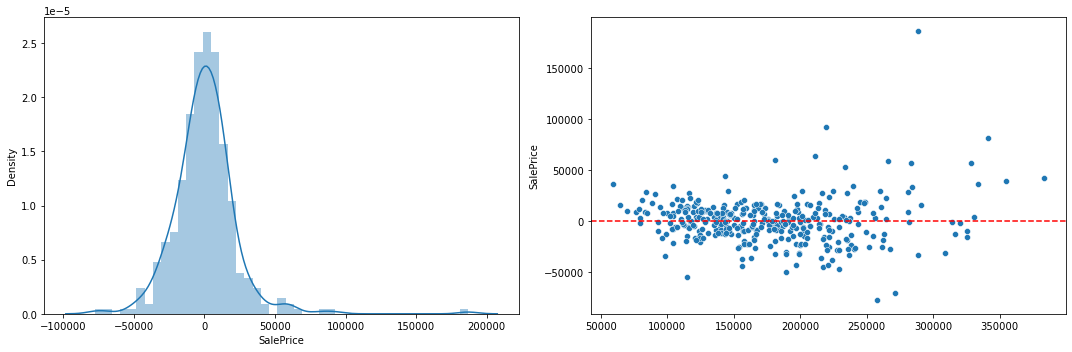

In [57]:
# Doubling the value of alpha for Ridge
Ridge_Regression = Ridge(alpha=318, solver='auto', random_state=1) #Optimal lamda/alpha value
Ridge_Regression.fit(X_train, y_train)
y_pred_train = Ridge_Regression.predict(X_train)
y_pred_test = Ridge_Regression.predict(X_test)

print(f"{'-'*20}Training Performance Ridge{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance Ridge{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
residuals=(y_test - y_pred_test)
sns.distplot(residuals)

plt.subplot(1,2,2)
sns.scatterplot(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [58]:
coeff = pd.DataFrame(Ridge_Regression.coef_, X_train.columns, columns=['Contribution']).sort_values(by=['Contribution'],ascending=False)
coeff = coeff[coeff.Contribution!=0]

print('-'*100,'\n\n\033[1mThe project aims to create predictive model for the housing company, in order to predict the sales price for \
US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, \
The contribution of each feature is as follows:')

print('\nThe featues that have the highest positive contribution for sales price are: \n\
\033[0m1. GrLivArea: Above grade (ground) living area square feet. \n\
2. OverallQual: Rates the overall material and finish of the house.\n\
3. 1stFlrSF: First Floor square feet')

print('\n\033[1mThe featues that have the highest negative contribution for sales price are: \n\
\033[0m1. ExterQual_TA: Average/Typical quality of the material on the exterior .\n\
2. KitchenAbvGr: Kitchen above ground floor.\n\
3. KitchenQual_TA: Typical/Average quality of kitchen.')

print('\n\n\033[1mWe derived that the various features towards increase in unit sales price:')
print(coeff)

---------------------------------------------------------------------------------------------------- 

The project aims to create predictive model for the housing company, in order to predict the sales price for US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, The contribution of each feature is as follows:

The featues that have the highest positive contribution for sales price are: 
1. GrLivArea: Above grade (ground) living area square feet. 
2. OverallQual: Rates the overall material and finish of the house.
3. 1stFlrSF: First Floor square feet

The featues that have the highest negative contribution for sales price are: 
1. ExterQual_TA: Average/Typical quality of the material on the exterior .
2. KitchenAbvGr: Kitchen above ground floor.
3. KitchenQual_TA: Typical/Average quality of kitchen.


We derived that the various features towards increase in unit sales price:
                      Contribution
GrLivA

--------------------Training Performance Ridge--------------------

R2-Score on Training set ---> 0.91
Residual Sum of Squares (RSS) on Training set  ---> 324676811412.0
Mean Absolute Error (MAE) on Training set      ---> 13765.94
Mean Squared Error (MSE) on Training set       ---> 388369391.64
Root Mean Squared Error (RMSE) on Training set ---> 19707.09

--------------------Testing Performance Ridge--------------------

R2-Score on Testing set ---> 0.88
Residual Sum of Squares (RSS) on Testing set  ---> 161462772962.25
Mean Absolute Error (MAE) on Testing set      ---> 14230.55
Mean Squared Error (MSE) on Testing set       ---> 449757027.75
Root Mean Squared Error (RMSE) on Testing set ---> 21207.48

--------------------Residual Plots--------------------


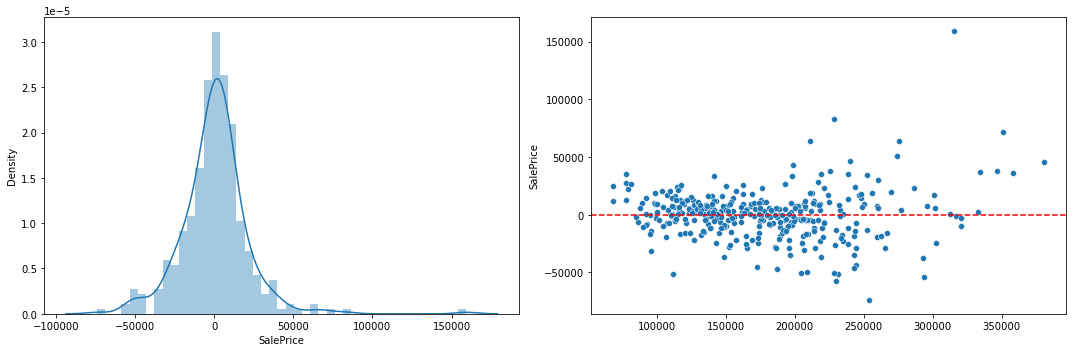

In [59]:
# Doubling the value of alpha for Lasso
Lasso_Regression = Lasso(alpha=1120) #Optimal lamda/alpha value
Lasso_Regression.fit(X_train, y_train)
y_pred_train = Lasso_Regression.predict(X_train)
y_pred_test = Lasso_Regression.predict(X_test)

print(f"{'-'*20}Training Performance Ridge{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance Ridge{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
residuals=(y_test - y_pred_test)
sns.distplot(residuals)

plt.subplot(1,2,2)
sns.scatterplot(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [60]:
coeff = pd.DataFrame(Lasso_Regression.coef_, X_train.columns, columns=['Contribution']).sort_values(by=['Contribution'],ascending=False)
coeff = coeff[coeff.Contribution!=0]

print('-'*100,'\n\n\033[1mThe project aims to create predictive model for the housing company, in order to predict the sales price for \
US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, \
The contribution of each feature is as follows:')

print('\nThe featues that have the highest positive contribution for sales price are: \n\
\033[0m1. GrLivArea: Above grade (ground) living area square feet. \n\
2. OverallQual: Rates the overall material and finish of the house.\n\
3. BsmtQual_Ex: Basement quality excellent')

print('\n\033[1mThe featues that have the highest negative contribution for sales price are: \n\
\033[0m1. KitchenAbvGr: Kitchen above ground floor .\n\
2. ExterQual_TA: Average quality of the material on the exterior.\n\
3. BldgType_TwnhsE: Typical/Average quality of kitchen.')

print('\n\n\033[1mWe derived that the various features towards increase in unit sales price:')
print(coeff)

---------------------------------------------------------------------------------------------------- 

The project aims to create predictive model for the housing company, in order to predict the sales price for US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, The contribution of each feature is as follows:

The featues that have the highest positive contribution for sales price are: 
1. GrLivArea: Above grade (ground) living area square feet. 
2. OverallQual: Rates the overall material and finish of the house.
3. BsmtQual_Ex: Basement quality excellent

The featues that have the highest negative contribution for sales price are: 
1. KitchenAbvGr: Kitchen above ground floor .
2. ExterQual_TA: Average quality of the material on the exterior.
3. BldgType_TwnhsE: Typical/Average quality of kitchen.


We derived that the various features towards increase in unit sales price:
                 Contribution
GrLivArea   

Dropping 5 top features 

In [61]:
X_train_t5 = X_train.drop(['GrLivArea','OverallQual','BsmtQual_Ex','TotalBsmtSF','YearBuilt'], axis=1)
X_test_t5 = X_test.drop(['GrLivArea','OverallQual','BsmtQual_Ex','TotalBsmtSF','YearBuilt'], axis=1)

In [62]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 1)
hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
Lasso_Regression = Lasso()
GridSearch = GridSearchCV(Lasso_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train_t5, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 602494573.1292377
Best parameter ---> {'alpha': 100}


In [63]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 2)
hyper_param = {'alpha':[100, 200, 300, 400, 500]}
Lasso_Regression = Lasso()
GridSearch = GridSearchCV(Lasso_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train_t5, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 548429535.2569308
Best parameter ---> {'alpha': 300}


In [64]:
#Fine tuning Lambda/alpha as the hyper parameter. (Round 2)
hyper_param = {'alpha':[250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350]}
Lasso_Regression = Lasso()
GridSearch = GridSearchCV(Lasso_Regression, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5)
GridSearchCV_technique = GridSearch.fit(X_train_t5, y_train)
print('Best Score --->',-GridSearchCV_technique.best_score_)
print('Best parameter --->',GridSearchCV_technique.best_params_)

Best Score ---> 547697174.8401839
Best parameter ---> {'alpha': 340}


--------------------Training Performance Lasso--------------------

R2-Score on Training set ---> 0.93
Residual Sum of Squares (RSS) on Training set  ---> 254063965721.45
Mean Absolute Error (MAE) on Training set      ---> 12488.68
Mean Squared Error (MSE) on Training set       ---> 303904265.22
Root Mean Squared Error (RMSE) on Training set ---> 17432.85

--------------------Testing Performance Lasso--------------------

R2-Score on Testing set ---> 0.86
Residual Sum of Squares (RSS) on Testing set  ---> 197047887114.29
Mean Absolute Error (MAE) on Testing set      ---> 15796.51
Mean Squared Error (MSE) on Testing set       ---> 548879908.4
Root Mean Squared Error (RMSE) on Testing set ---> 23428.19

--------------------Residual Plots--------------------


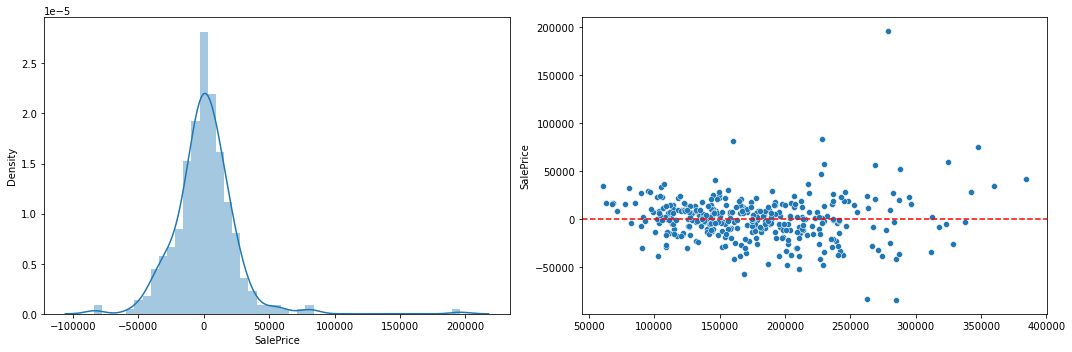

In [65]:
#Training the final Lasso Regression Model
Lasso_Regression = Lasso(alpha=340) #Optimal lamda/alpha value
Lasso_Regression.fit(X_train_t5, y_train)
y_pred_train = Lasso_Regression.predict(X_train_t5)
y_pred_test = Lasso_Regression.predict(X_test_t5)

print(f"{'-'*20}Training Performance Lasso{'-'*20}")
print('\nR2-Score on Training set --->',round(r2_score(y_train, y_pred_train),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train - y_pred_train)),2))
print('Mean Absolute Error (MAE) on Training set      --->',round(mean_absolute_error(y_train, y_pred_train),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, y_pred_train),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round((mean_squared_error(y_train, y_pred_train)**0.5),2))

print(f"\n{'-'*20}Testing Performance Lasso{'-'*20}")
print('\nR2-Score on Testing set --->',round(r2_score(y_test, y_pred_test),2))
print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test - y_pred_test)),2))
print('Mean Absolute Error (MAE) on Testing set      --->',round(mean_absolute_error(y_test, y_pred_test),2))
print('Mean Squared Error (MSE) on Testing set       --->',round(mean_squared_error(y_test, y_pred_test),2))
print('Root Mean Squared Error (RMSE) on Testing set --->',round((mean_squared_error(y_test, y_pred_test)**0.5),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
residuals=(y_test - y_pred_test)
sns.distplot(residuals)

plt.subplot(1,2,2)
sns.scatterplot(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [66]:
coeff = pd.DataFrame(Lasso_Regression.coef_, X_train_t5.columns, columns=['Contribution']).sort_values(by=['Contribution'],ascending=False)
coeff = coeff[coeff.Contribution!=0]

print('-'*100,'\n\n\033[1mThe project aims to create predictive model for the housing company, in order to predict the sales price for \
US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, \
The contribution of each feature is as follows:')

print('\nThe featues that have the highest positive contribution for sales price are: \n\
\033[0m1. GrLivArea: Above grade (ground) living area square feet. \n\
2. OverallQual: Rates the overall material and finish of the house.\n\
3. 1stFlrSF: First Floor square feet')

print('\n\033[1mThe featues that have the highest negative contribution for sales price are: \n\
\033[0m1. ExterQual_TA: Average/Typical quality of the material on the exterior .\n\
2. KitchenAbvGr: Kitchen above ground floor.\n\
3. KitchenQual_TA: Typical/Average quality of kitchen.')

print('\n\n\033[1mWe derived that the various features towards increase in unit sales price:')
print(coeff)

---------------------------------------------------------------------------------------------------- 

The project aims to create predictive model for the housing company, in order to predict the sales price for US-based houses based on various criterion, with the help of sample data collected. Based on the optimal predictive model, The contribution of each feature is as follows:

The featues that have the highest positive contribution for sales price are: 
1. GrLivArea: Above grade (ground) living area square feet. 
2. OverallQual: Rates the overall material and finish of the house.
3. 1stFlrSF: First Floor square feet

The featues that have the highest negative contribution for sales price are: 
1. ExterQual_TA: Average/Typical quality of the material on the exterior .
2. KitchenAbvGr: Kitchen above ground floor.
3. KitchenQual_TA: Typical/Average quality of kitchen.


We derived that the various features towards increase in unit sales price:
                 Contribution
2ndFlrSF   